# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST

 Предварительно устанавливаем необходимые зависимости для работы
 
 Запускаться через tf_gpu исходя из инструкции к Anaconda. https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
 
 Иначе система не сможет определить использовать видеокарты.

In [1]:
%pip install keras==2.6
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from keras.datasets import fashion_mnist  # импорт исходного датасета
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [6]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Нормализуем
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

4431872/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


## 1.3. Визуализируем часть данных из датасета

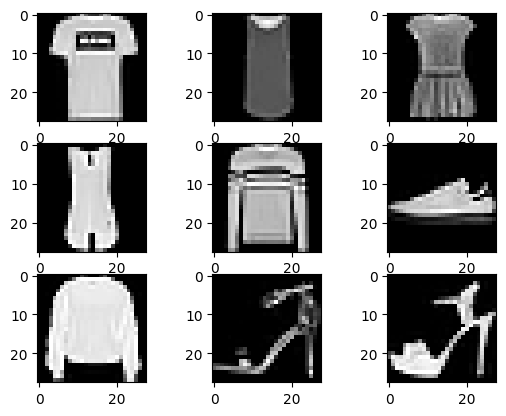

In [7]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## 1.5. Обучаем модель

In [9]:
%time
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


his = model.fit(trainX, trainY, batch_size=256,
                epochs=50, validation_data=(testX, testY))

model.evaluate(testX, testY)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/50
235/235 [==============================] - 7s 18ms/step - loss: 1.0199 - accuracy: 0.6913 - val_loss: 0.6013 - val_accuracy: 0.7836
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.5233 - accuracy: 0.8120 - val_loss: 0.4935 - val_accuracy: 0.8235
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.4489 - accuracy: 0.8408 - val_loss: 0.4468 - val_accuracy: 0.8385
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.4134 - accuracy: 0.8547 - val_loss: 0.4193 - val_accuracy: 0.8519
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.3903 - accuracy: 0.8638 - val_loss: 0.3963 - val_accuracy: 0.8592
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.3736 - accuracy: 0.8692 - val_loss: 0.3820 - val_accuracy: 0.8631
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.3593 - accuracy: 0.8752 - 

[0.25352421402931213, 0.909600019454956]

## 1.5. Анализируем обученную модель. Строим график (графики) обучения

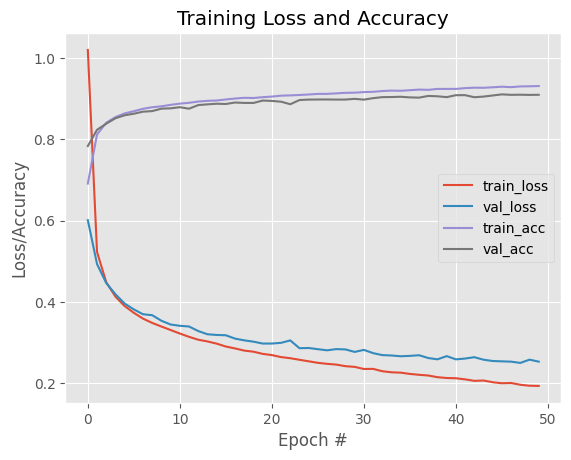

In [10]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети

In [4]:
import cv2


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def test_predict(image_path):
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    image = image.reshape(-1, 28, 28, 1)
    preds = model.predict(image)
    i = preds.argmax(axis=1)[0]
    for index, pred in enumerate(preds[0]):
        print(f"{class_names[index]}:{pred * 100:.2f}%", end="; ")
    print()
    text = "{}: {:.2f}%".format(class_names[i], preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))